In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_VJC_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1309,2024-05-27,108300,109400,107700,109000,638400
1310,2024-05-28,109900,109900,108500,109600,686800
1311,2024-05-29,109600,109700,107300,107900,816000
1312,2024-05-30,107000,108400,107000,107000,661900


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.7 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2428 - val_loss: 0.0058
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - val_loss: 0.0032
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - val_loss: 0.0027
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - val_loss: 0.0022
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 8.7941e-04
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 9.8274e-04
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 9.8231e-04
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - l

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 2051.111635813479
MAPE: 1.442065326190356 %
MSLE: 0.0003892773224971584


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.23913043 0.25181159 0.25362319 0.25       0.23188406 0.23007246
 0.21557971 0.2173913  0.20833333 0.20652174 0.21014493 0.19565217
 0.19021739 0.20289855 0.21376812 0.20289855 0.19746377 0.20108696
 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652 0.19927536
 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333 0.20652174
 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464
 0.17391304 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101
 0.18297101 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072
 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391
 0.125      0.14673913 0.16666667 0.17028986 0.16666667 0.16123188
 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391
 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304
 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261
 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942
 0.41847826 0.45289855 0.42028986 0.42572464 0.4293

7 day output [[0.21341856]]
8 day input [0.20833333 0.20652174 0.21014493 0.19565217 0.19021739 0.20289855
 0.21376812 0.20289855 0.19746377 0.20108696 0.21557971 0.2173913
 0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101 0.17934783
 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754
 0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 

15 day output [[0.21825854]]
16 day input [0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058
 0.20833333 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942
 0.19384058 0.17572464 0.17391304 0.16847826 0.17210145 0.17753623
 0.19202899 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087
 0.15217391 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797
 0.15942029 0.15217391 0.125      0.14673913 0.16666667 0.17028986
 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913
 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.23027495 0.22260974

24 day output [[0.2147486]]
25 day input [0.19384058 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739
 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304
 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101
 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188
 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391 0.125
 0.14673913 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667
 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.23027495 0.22260974 0.20382458
 0.21077664 0.2049531  0.19954556 0.20088817 0.21341856 0.21416204
 0.21015325 0.21513899 0.2

33 day output [[0.21434815]]
34 day input [0.19384058 0.17572464 0.17391304 0.16847826 0.17210145 0.17753623
 0.19202899 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087
 0.15217391 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797
 0.15942029 0.15217391 0.125      0.14673913 0.16666667 0.17028986
 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913
 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.23027495 0.22260974 0.20382458 0.21077664 0.2049531  0.19954556
 0.20088817 0.21341856 0.21416204 0.21015325 0.21513899 0.21880867
 0.21853523 0.22080652 0.22033106 0.21825854 0.22407216 0.21512575
 0.20751686 0.20880015

43 day output [[0.24169543]]
44 day input [0.16666667 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754
 0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478
 0.23913043 0.24094203 0.23027495 0.22260974 0.20382458 0.21077664
 0.2049531  0.19954556 0.20088817 0.21341856 0.21416204 0.21015325
 0.21513899 0.21880867 0.21853523 0.22080652 0.22033106 0.21825854
 0.22407216 0.21512575 0.20751686 0.20880015 0.20321245 0.20503415
 0.2180973  0.21577325 0.21474861 0.21709096 0.21419083 0.21342091
 0.21501809 0.214520

52 day output [[0.25316453]]
53 day input [0.15217391 0.125      0.14673913 0.16666667 0.17028986 0.16666667
 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638
 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449
 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464
 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623
 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464 0.42934783
 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638
 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203 0.23027495
 0.22260974 0.20382458 0.21077664 0.2049531  0.19954556 0.20088817
 0.21341856 0.21416204 0.21015325 0.21513899 0.21880867 0.21853523
 0.22080652 0.22033106 0.21825854 0.22407216 0.21512575 0.20751686
 0.20880015 0.20321245 0.20503415 0.2180973  0.21577325 0.21474861
 0.21709096 0.21419083 0.21342091 0.21501809 0.21452005 0.21572658
 0.21623428 0.21388416 0.21434815 0.21652396 0.21925086 0.21980691
 0.22665393 0.229363

60 day output [[0.2500308]]
61 day input [0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.23027495 0.22260974 0.20382458
 0.21077664 0.2049531  0.19954556 0.20088817 0.21341856 0.21416204
 0.21015325 0.21513899 0.21880867 0.21853523 0.22080652 0.22033106
 0.21825854 0.22407216 0.21512575 0.20751686 0.20880015 0.20321245
 0.20503415 0.2180973  0.21577325 0.21474861 0.21709096 0.21419083
 0.21342091 0.21501809 0.21452005 0.21572658 0.21623428 0.21388416
 0.21434815 0.21652396 0.21925086 0.21980691 0.22665393 0.22936371
 0.23091349 0.23691052 0.23664668 0.23789316 0.24169543 0.24191724
 0.24483007 0.2468654

70 day output [[0.25133717]]
71 day input [0.17391304 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464
 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623
 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464 0.42934783
 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638
 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203 0.23027495
 0.22260974 0.20382458 0.21077664 0.2049531  0.19954556 0.20088817
 0.21341856 0.21416204 0.21015325 0.21513899 0.21880867 0.21853523
 0.22080652 0.22033106 0.21825854 0.22407216 0.21512575 0.20751686
 0.20880015 0.20321245 0.20503415 0.2180973  0.21577325 0.21474861
 0.21709096 0.21419083 0.21342091 0.21501809 0.21452005 0.21572658
 0.21623428 0.21388416 0.21434815 0.21652396 0.21925086 0.21980691
 0.22665393 0.22936371 0.23091349 0.23691052 0.23664668 0.23789316
 0.24169543 0.24191724 0.24483007 0.24686545 0.24644867 0.2490658
 0.25035492 0.25018069 0.25139183 0.25316453 0.25433698 0.25363785
 0.2545355  0.2538296

82 day output [[0.24873808]]
83 day input [0.4365942  0.41847826 0.45289855 0.42028986 0.42572464 0.42934783
 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638
 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203 0.23027495
 0.22260974 0.20382458 0.21077664 0.2049531  0.19954556 0.20088817
 0.21341856 0.21416204 0.21015325 0.21513899 0.21880867 0.21853523
 0.22080652 0.22033106 0.21825854 0.22407216 0.21512575 0.20751686
 0.20880015 0.20321245 0.20503415 0.2180973  0.21577325 0.21474861
 0.21709096 0.21419083 0.21342091 0.21501809 0.21452005 0.21572658
 0.21623428 0.21388416 0.21434815 0.21652396 0.21925086 0.21980691
 0.22665393 0.22936371 0.23091349 0.23691052 0.23664668 0.23789316
 0.24169543 0.24191724 0.24483007 0.24686545 0.24644867 0.2490658
 0.25035492 0.25018069 0.25139183 0.25316453 0.25433698 0.25363785
 0.2545355  0.25382963 0.25163504 0.25232249 0.25076872 0.25003079
 0.25129959 0.25044966 0.25063217 0.25107515 0.25001183 0.25017697
 0.25086147 0.2508055

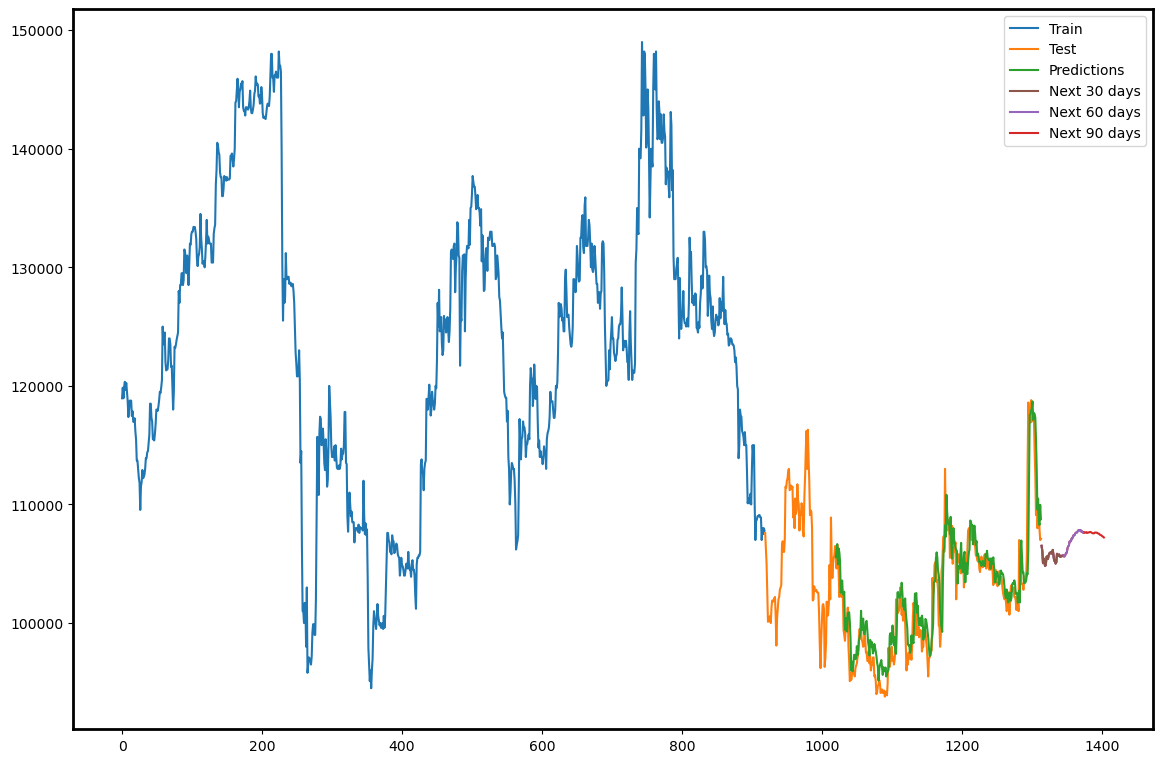

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_VJC_73.png")
plt.show()